In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [224]:
df = pd.read_excel('src/get_around_delay_analysis.xlsx')

In [225]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 21310

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [226]:
# add some columns for the EDA
checkout = []
for x in df['delay_at_checkout_in_minutes']:
    if x < 0:
        checkout.append('Early')
    elif x < 30:
        checkout.append('Late under 30 min')
    elif x < 60:
        checkout.append('Late 30-60 min')
    elif x < 120 :
        checkout.append('Late 60-120 min')
    elif x < 180 :
        checkout.append('Late 120-180 min')
    elif x >= 180 :
        checkout.append('Late more than 180 min')          
    else:
        checkout.append('Early')

df['checkout'] = checkout

late = []
for x in df['delay_at_checkout_in_minutes']:
    if x > 0:
        late.append('come later')
    else:
        late.append('come earlier')

df['late'] = late

rented_again = []
for x in df['time_delta_with_previous_rental_in_minutes']:
    if x >=0:
        rented_again.append('rented again')
    else:
        rented_again.append('Parking')
    
df['rented_again'] = rented_again

In [227]:
# save file for streamlt app
df.to_csv('src/clean_get_around_delay_analysis.csv', index=False)

In [228]:
# pie for checkin type
fig = px.pie(df, values=df['checkin_type'].value_counts(), names=['mobile','connect'])
fig.update_layout(title={'text': "Checkin type for rental",'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    height=500,
                    width=500,
                )
fig.show()

In [202]:
# data for streamlit app
ended = round(len(df[df['state'] == 'ended'])/len(df)*100,2)
print(f'{ended} % of rental request are ended')

84.68 % of rental request are ended


In [203]:
# create news dataframe for rental ended
df_ended = df[df['state'] == 'ended']
print(len(df_ended))

18045


In [229]:
# data for streamlit app
df_late = df_ended[df_ended['delay_at_checkout_in_minutes'] > 0]
late_median_time = round(df_late['delay_at_checkout_in_minutes'].median(), 0).astype(int)
late_median_time

53

In [230]:
#check value counts to use the order for next plot
df_ended['checkout'].value_counts()

Early                     8519
Late under 30 min         3376
Late 60-120 min           1860
Late more than 180 min    1766
Late 30-60 min            1722
Late 120-180 min           802
Name: checkout, dtype: int64

In [231]:
#pie for checkout time
labels = ["Early", "Late under 30 min","Late 60-120 min", "Late more than 180 min", "Late 30-60 min", 'Late 120-180 min']

fig = go.Figure(data=[go.Pie(labels=labels, values=df_ended['checkout'].value_counts(), textinfo='label+percent',
                             insidetextorientation='radial',
                             pull=[0, 0, 0.1, 0.3, 0., 0.2]
                            )])
fig.update(layout_title_text='Checkout time : Early and Late',
          layout_legend=dict(yanchor="top", y=0.6, xanchor="left", x=-1
))

fig.show()

<AxesSubplot: xlabel='time_delta_with_previous_rental_in_minutes', ylabel='count'>

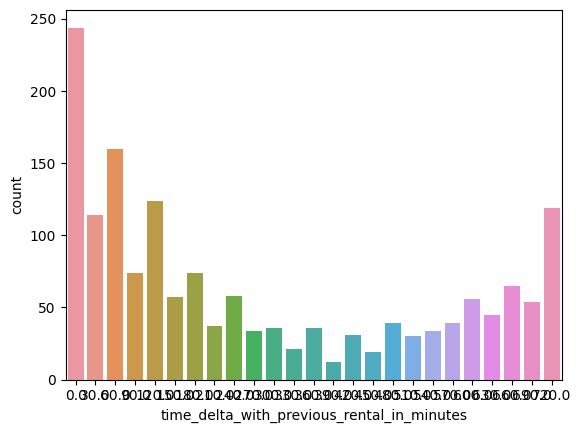

In [210]:
# plot for time delta countplot
sns.countplot(data = df_ended, x='time_delta_with_previous_rental_in_minutes')

In [232]:
# test with groupby before plot
df.groupby(['rented_again', 'late', 'checkin_type'], as_index=False).size()

,rented_again,late,checkin_type,size
0,Parking,come earlier,connect,2311
1,Parking,come earlier,mobile,8556
2,Parking,come later,connect,1183
3,Parking,come later,mobile,7419
4,rented again,come earlier,connect,537
5,rented again,come earlier,mobile,502
6,rented again,come later,connect,276
7,rented again,come later,mobile,526


In [233]:
#data for strealit app
parking = round(len(df[df['rented_again'] == 'Parking'])/len(df)*100, 2)
print(f'{parking} % of rental are not rented for the same day')

91.36 % of rental are not rented for the same day


In [235]:
# proportion of car rented again, with time for checkout and the checkintype
fig = px.sunburst(pd.DataFrame(df.groupby(['rented_again', 'late', 'checkin_type'], as_index=False).size()),
                    path = ['rented_again', 'late', 'checkin_type'],
                    values='size',
                )
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title={'text': "Car rented again, with time for checkout and the checkintype", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=600,
                    width=600,
                )
fig.show()

In [213]:
# new df for rentedagain the car with previous checkout is late
df_rented_again_late = df[(df['rented_again'] == 'rented again') & (df['late'] == 'come later')]
df_rented_again_late.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout,late,rented_again
19,519491,312389,mobile,ended,58.0,545639.0,420.0,Late 30-60 min,come later,rented again
87,535611,397814,mobile,ended,68.0,535512.0,300.0,Late 60-120 min,come later,rented again
90,535770,352436,mobile,ended,74.0,524703.0,60.0,Late 60-120 min,come later,rented again
107,537576,397470,mobile,ended,18.0,539005.0,0.0,Late under 30 min,come later,rented again
148,540479,374684,mobile,ended,12.0,539751.0,0.0,Late under 30 min,come later,rented again


In [236]:
# data for streamlit app
rented_again_late = round(len(df_rented_again_late)/len(df)*100,2)
print(f'{rented_again_late} % of rental car are late when the car is rented again')

3.76 % of rental car are late when the car is rented again


In [237]:
#check value counts to use the order for next plot
df_rented_again_late['checkout'].value_counts()

Late under 30 min         260
Late 30-60 min            188
Late 60-120 min           168
Late more than 180 min    126
Late 120-180 min           60
Name: checkout, dtype: int64

In [238]:
#pie for rented again and come later
labels = ["Late under 30 min", "Late 30-60 min", "Late 60-120 min", "Late more than 180 min", 'Late 120-180 min']

fig = go.Figure(data=[go.Pie(labels=labels, values=df_rented_again_late['checkout'].value_counts(), textinfo='label+percent',
                             insidetextorientation='radial',
                             pull=[ 0, 0, 0, 0.2, 0]
                            )])
fig.update(layout_title_text='Car rented again and come later',
          layout_legend=dict(yanchor="top", y=0.6, xanchor="left", x=-1
))

fig.show()

In [239]:
# data for streamlit app
rented_again_late180 = round(len(df_rented_again_late[df_rented_again_late['checkout'] == 'Late more than 180 min'])/len(df)*100,2)
print(f'{rented_again_late180} % of rental car are late more than 180 min when the car is rented again')

0.59 % of rental car are late more than 180 min when the car is rented again
